In [1]:

import numpy as np
import pandas as pd
from pathlib import Path
import gc
import itertools
import importlib
from IPython.display import clear_output
import matplotlib.pyplot as plt


# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp

# BBStudies
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.XMask.Utils as xutils
import BBStudies.Physics.Constants as cst
import BBStudies.Plotting.Bokeh.Tools as bktools
import BBStudies.Plotting.Bokeh.Presets as bkpresets
import BBStudies.Physics.Base as phys



---
# Loading data
---

In [20]:

partition_ID    = '00'

tbt_path        = 'tracking/coupling_study/FULL/TEST_NO_OCTU_XPLANE_ZETA_0'
data_0          = xPlus.Tracking_Interface.from_parquet(tbt_path  ,partition_name='CHUNK',partition_ID=partition_ID)

tbt_path        = 'tracking/coupling_study/FULL/TEST_NO_OCTU_XPLANE_ZETA_1'
data_1          = xPlus.Tracking_Interface.from_parquet(tbt_path  ,partition_name='CHUNK',partition_ID=partition_ID)

tbt_path        = 'tracking/coupling_study/FULL/TEST_NO_OCTU_XPLANE_ZETA_2'
data_2          = xPlus.Tracking_Interface.from_parquet(tbt_path  ,partition_name='CHUNK',partition_ID=partition_ID)
# data

In [10]:
partition_ID    = '00'

tbt_path        = 'tracking/coupling_study/FULL/TEST_XPLANE_ZETA_0'
data_0          = xPlus.Tracking_Interface.from_parquet(tbt_path  ,partition_name='CHUNK',partition_ID=partition_ID)

tbt_path        = 'tracking/coupling_study/FULL/TEST_XPLANE_ZETA_1'
data_1          = xPlus.Tracking_Interface.from_parquet(tbt_path  ,partition_name='CHUNK',partition_ID=partition_ID)

tbt_path        = 'tracking/coupling_study/FULL/TEST_XPLANE_ZETA_2'
data_2          = xPlus.Tracking_Interface.from_parquet(tbt_path  ,partition_name='CHUNK',partition_ID=partition_ID)

In [2]:
partition_ID    = '00'

tbt_path        = 'tracking/coupling_study/FULL/TEST_BUNCH_0220_XPLANE_ZETA_0'
data_0          = xPlus.Tracking_Interface.from_parquet(tbt_path  ,partition_name='CHUNK',partition_ID=partition_ID)

---
# Plotting
---

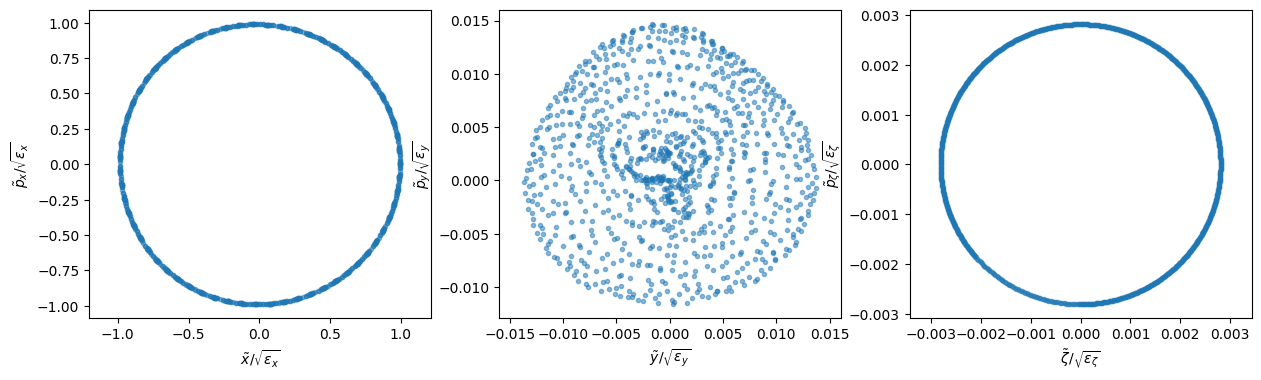

In [31]:


part_idx = 20

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for df in [data_0.df_sig]:#,data_1.df_sig,data_2.df_sig]:
    particle = df.groupby('particle').get_group(part_idx)
    
    # Plotting Here
    for plane,ax in zip(['x','y','zeta'],axes):
        plt.sca(ax)
        plt.plot(particle[f'{plane}_sig'],particle[f'p{plane}_sig'],'.',alpha=0.5)


# Adding labels
for plane,ax in zip(['x','y','zeta'],axes):
    plt.sca(ax)
    plt.axis('equal')
    if plane == 'zeta':
        plane = '\zeta'
    plt.xlabel(rf'$\tilde {plane}/\sqrt{{\varepsilon_{plane}}}$')
    plt.ylabel(rf'$\tilde p_{plane}/\sqrt{{\varepsilon_{plane}}}$')


In [9]:
data_0.df.particle.unique()[::100]

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
       2200, 2300, 2400, 2500, 2600, 2700])

In [4]:
data_0.to_parquet('to_delete.parquet',partition_name='CHUNK',partition_ID='00',handpick_particles=data_0.df.particle.unique()[::100])

╭──────────────────────────── Tracking_Interface ────────────────────────────╮
│ ╭────────────────────────────────────────────────────────────────────────╮ │
│ │ <BBStudies.Tracking.XsuitePlus.RenderingTracker object at 0x29a54aa90> │ │
│ ╰────────────────────────────────────────────────────────────────────────╯ │
│                                                                            │
│   context_name = 'ContextCpu'                                              │
│      exec_time = 123.51870529097505                                        │
│         method = '6d'                                                      │
│     monitor_at = 'tcp.c6l7.b1'                                             │
│        n_parts = 2751                                                      │
│        n_turns = 999                                                       │
│       nemitt_x = 1.8e-06                                                   │
│       nemitt_y = 1.8e-06                                                   │
│    nemitt_zeta = 2.5188993392865395                                        │
│   parquet_data = '_df'                                                     │
│ particle_on_co = "<class 'xpart.particles.particles.Particles'>"           │
│   partition_ID = '00'                                                      │
│ partition_name = 'CHUNK'                                                   │
│        sigma_z = 0.09                                                      │
│  start_at_turn = 0                                                         │
│   stop_at_turn = 999                                                       │
╰────────────────────────────────────────────────────────────────────────────╯